# Jupyter workflow

> The classic Jake Vanderplas 'Jupyter Data Science Workflow', remastered using `nbdev`.

In [ ]:
#| default_exp jupyter_workflow

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [ ]:
#| export
import os
from urllib.request import urlretrieve

import pandas as pd
import numpy as np

In [ ]:
#| export
FREMONT_URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [ ]:
#| export
def get_fremont_data(filename='Fremont.csv', url=FREMONT_URL,
                     force_download=False):
    """Download and cache the fremont data
    Parameters
    ----------
    filename : string (optional)
        location to save the data
    url : string (optional)
        web location of the data
    force_download : bool (optional)
        if True, force redownload of data
    Returns
    -------
    data : pandas.DataFrame
        The fremont bridge data
    """
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv(filename, index_col='Date')

    try:
        data.index = pd.to_datetime(data.index, format='%m/%d/%Y %I:%M:%S %p')
    except TypeError:
        data.index = pd.to_datetime(data.index)

    data.columns = ['Total', 'East', 'West']
    data['Total'] = data['West'] + data['East']
    return data

In [ ]:
def test_fremont_data():
    data = get_fremont_data()
    assert all(data.columns == ['Total', 'East', 'West'])
    assert isinstance(data.index, pd.DatetimeIndex)
    assert len(np.unique(data.index.time) == 24)

In [ ]:
test_fremont_data()

In [ ]:
np.arange(4)

array([0, 1, 2, 3])

In [ ]:
!head Fremont.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
08/01/2022 12:00:00 AM,23,7,16
08/01/2022 01:00:00 AM,12,5,7
08/01/2022 02:00:00 AM,3,0,3
08/01/2022 03:00:00 AM,5,2,3
08/01/2022 04:00:00 AM,10,2,8
08/01/2022 05:00:00 AM,27,5,22
08/01/2022 06:00:00 AM,100,43,57
08/01/2022 07:00:00 AM,219,90,129
08/01/2022 08:00:00 AM,335,143,192


In [ ]:
data = pd.read_csv('Fremont.csv', index_col='Date')
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
08/01/2022 12:00:00 AM,23.0,7.0,16.0
08/01/2022 01:00:00 AM,12.0,5.0,7.0
08/01/2022 02:00:00 AM,3.0,0.0,3.0
08/01/2022 03:00:00 AM,5.0,2.0,3.0
08/01/2022 04:00:00 AM,10.0,2.0,8.0


In [ ]:
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2022-08-01 00:00:00', '2022-08-01 01:00:00',
               '2022-08-01 02:00:00', '2022-08-01 03:00:00',
               '2022-08-01 04:00:00', '2022-08-01 05:00:00',
               '2022-08-01 06:00:00', '2022-08-01 07:00:00',
               '2022-08-01 08:00:00', '2022-08-01 09:00:00',
               ...
               '2022-09-30 14:00:00', '2022-09-30 15:00:00',
               '2022-09-30 16:00:00', '2022-09-30 17:00:00',
               '2022-09-30 18:00:00', '2022-09-30 19:00:00',
               '2022-09-30 20:00:00', '2022-09-30 21:00:00',
               '2022-09-30 22:00:00', '2022-09-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=87600, freq=None)

In [ ]:
data.columns

Index(['Fremont Bridge Total', 'Fremont Bridge East Sidewalk',
       'Fremont Bridge West Sidewalk'],
      dtype='object')

In [ ]:
data = get_fremont_data()
data.head()

,Total,East,West
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


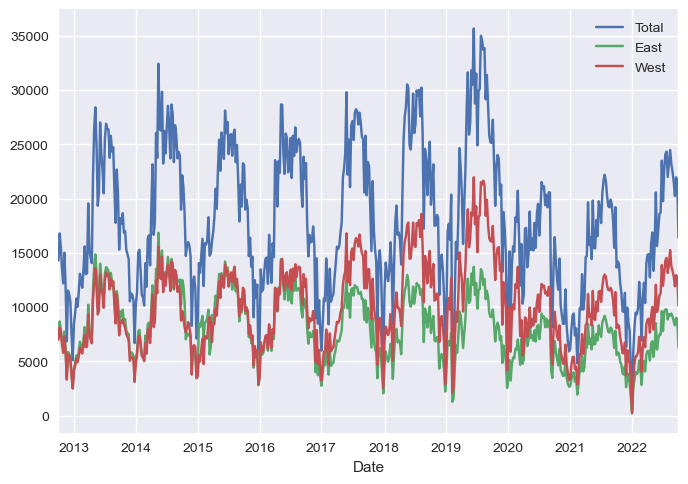

In [ ]:
data.resample('W').sum().plot();

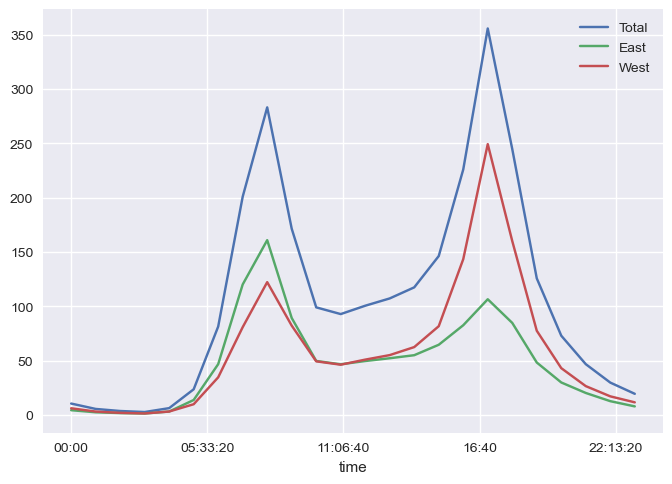

In [ ]:
data.groupby(data.index.time).mean().plot();

In [ ]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


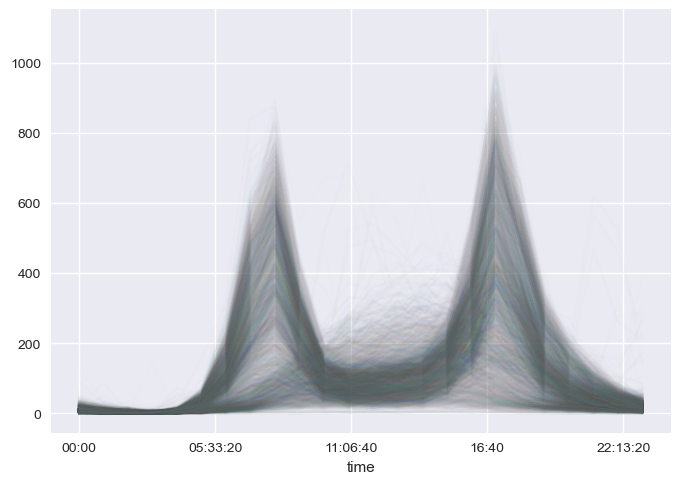

In [ ]:
pivoted.plot(legend=False, alpha=0.01);

In [ ]:
#| export
def say_hello(to):
    "Say hello to somebody"
    return f'Hello {to}!'

In [ ]:
say_hello("Isaac")

'Hello Isaac!'

In [ ]:
assert say_hello("Hamel")=="Hello Hamel!"

In [ ]:
from fastcore.test import *

In [ ]:
test_eq(say_hello("Hamel"), "Hello Hamel!")

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()